In [21]:
import pandas as pd
import glob
import numpy as np

In [22]:
ned=pd.read_csv('data3/simulatedHouses.csv')
ned.t=pd.to_datetime(ned.t, utc=True)
ned=ned.set_index('t')
ned.index=ned.index.tz_convert("Europe/Rome")
ned

P
t                                     
2013-01-01 01:00:00+01:00  2056.421667
2013-01-01 02:00:00+01:00  1864.835556
2013-01-01 03:00:00+01:00  1217.258611
2013-01-01 04:00:00+01:00  1405.176944
2013-01-01 05:00:00+01:00  1363.082222
...                                ...
2013-12-30 21:00:00+01:00  2639.680000
2013-12-30 22:00:00+01:00  3306.314722
2013-12-30 23:00:00+01:00  1874.836389
2013-12-31 00:00:00+01:00  3986.457500
2013-12-31 01:00:00+01:00  2746.000000

[8737 rows x 1 columns]

In [32]:
production=pd.read_csv('production3/100_m_production.csv')
production

Unnamed: 0     greedy_m
0               0   868.628021
1               1   974.837761
2               2   996.297833
3               3  1003.422595
4               4   980.641144
...           ...          ...
16071       16071  1127.216251
16072       16072  1095.437356
16073       16073  1050.656088
16074       16074  1001.365920
16075       16075   913.787223

[16076 rows x 2 columns]

In [24]:
production=pd.read_csv('production3/100_m_production.csv')
production["Unnamed: 0"]=pd.read_csv('data/greedy_500_v.csv')["Unnamed: 0"].values[3:]
production=production.rename(columns={'Unnamed: 0': "date"})
production=production.set_index("date")
production.index=pd.to_datetime(production.index, utc=True)
production.index=production.index.tz_convert("Europe/Rome")
production=production.resample('1h').mean()
production

greedy_m
date                                  
2013-01-01 08:00:00+01:00   868.628021
2013-01-01 09:00:00+01:00   988.799834
2013-01-01 10:00:00+01:00  1088.469258
2013-01-01 11:00:00+01:00  1376.040402
2013-01-01 12:00:00+01:00  1983.529358
...                                ...
2013-12-31 12:00:00+01:00  2247.461108
2013-12-31 13:00:00+01:00  2113.244352
2013-12-31 14:00:00+01:00  1234.631453
2013-12-31 15:00:00+01:00  1107.980359
2013-12-31 16:00:00+01:00   957.576572

[8745 rows x 1 columns]

In [25]:
merged=ned.join(production)
merged.greedy_m=merged.greedy_m.fillna(0)

In [26]:
merged.difference=merged.greedy_m-merged.P

/home/matteo/anaconda3/envs/pv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [27]:
merged[8:16]

P     greedy_m
t                                                  
2013-01-01 09:00:00+01:00  1542.754444   988.799834
2013-01-01 10:00:00+01:00  2917.349722  1088.469258
2013-01-01 11:00:00+01:00  2919.832222  1376.040402
2013-01-01 12:00:00+01:00  2319.872500  1983.529358
2013-01-01 13:00:00+01:00  1917.252778  2050.900956
2013-01-01 14:00:00+01:00  1679.641111  1213.497459
2013-01-01 15:00:00+01:00  2735.268333  1068.387547
2013-01-01 16:00:00+01:00  2784.115833   985.951379

In [28]:
import matplotlib.pyplot as plt

(15706.0, 16070.0)

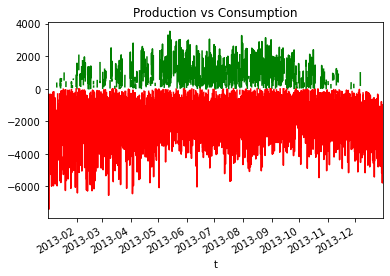

In [29]:
fig, ax = plt.subplots()
merged.difference.where(merged.difference.ge(0), np.nan).plot(kind='line',ax=ax,
                                                              color='green',
                                                              title='Production vs Consumption')
merged.difference.where(merged.difference.le(0), np.nan).plot(kind='line',ax=ax,color='red')

plt.xlim([merged.index[0],merged.index[-1]])

In [31]:
coverage=production.sum().greedy_m*100/merged.sum().P
print(f"The pv installation is able to cover the {coverage:.1f}")

The pv installation is able to cover the 35.3


In [19]:
merged.greedy_m.sum()/173000


966.0932429675714